In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [5]:
# STEP 1: Upload & Load Dataset
uploaded = files.upload()   # Upload "Top_Goals_CSV.csv"
df = pd.read_csv("Top_Goals_CSV.csv")

print("Original Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())


Saving Top_Goals_CSV.csv to Top_Goals_CSV (1).csv
Original Shape: (324, 19)

First 5 rows:
     Season  Rank           Player              Club  Goals  IsTop10  \
0  2023-24     1   Erling Haaland   Manchester City     27        1   
1  2023-24     2      Cole Palmer           Chelsea     22        1   
2  2023-24     3   Alexander Isak  Newcastle United     21        1   
3  2023-24     4    Ollie Watkins       Aston Villa     19        1   
4  2023-24     4  Dominic Solanke   AFC Bournemouth     19        1   

               Position  Age  Appearances  Goals_prev_season  Assists  \
0               Forward   23           31               36.0      6.0   
1  Attacking Midfielder   22           33                3.0     11.0   
2               Forward   24           30               10.0      2.0   
3               Forward   28           37               15.0     13.0   
4               Forward   26           38                6.0      3.0   

   Penalty_Goals  Non-Penalty_Goals  Goals

In [6]:
# STEP 2: Remove unwanted columns
df_cleaned = df.drop(columns=["MatchDate"], errors="ignore")


In [7]:
# STEP 3: Handle Null Values
df_cleaned = df_cleaned.dropna()

# STEP 4: Remove Duplicate Rows
df_cleaned = df_cleaned.drop_duplicates()
print("Final Cleaned Shape:", df_cleaned.shape)

Final Cleaned Shape: (91, 19)


In [8]:
# STEP 5: Detect categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object','category']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)



Categorical Columns: ['Season', 'Player', 'Club', 'Position']


In [9]:
# STEP 6: Label Encoding
df_label_encoded = df_cleaned.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])

In [10]:
# STEP 7: One Hot Encoding
df_onehot_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)

In [11]:
# STEP 8: Save All Datasets to CSV
df_cleaned.to_csv("Top_Goals_Cleaned.csv", index=False)
df_label_encoded.to_csv("Top_Goals_LabelEncoded.csv", index=False)
df_onehot_encoded.to_csv("Top_Goals_OneHotEncoded.csv", index=False)

In [12]:
# Download all three files
files.download("Top_Goals_Cleaned.csv")
files.download("Top_Goals_LabelEncoded.csv")
files.download("Top_Goals_OneHotEncoded.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

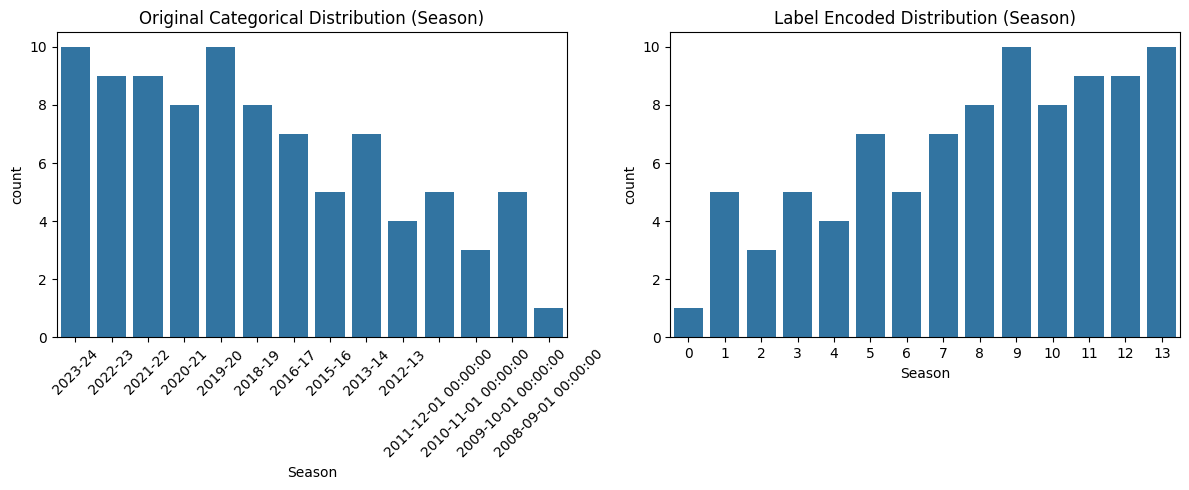

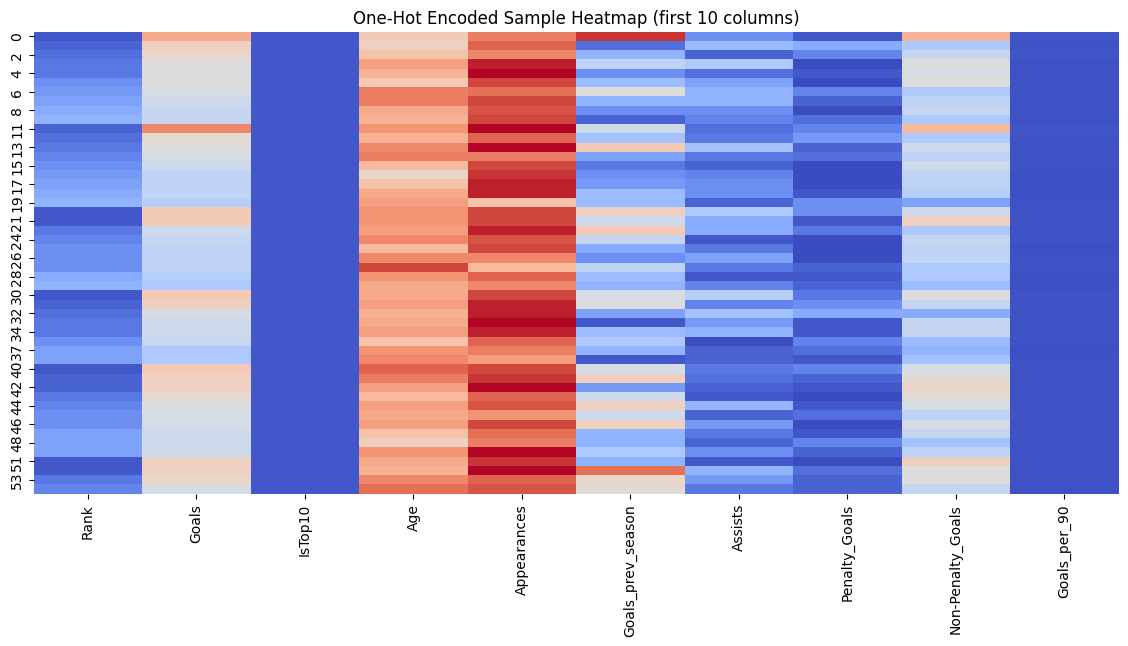

In [13]:
# STEP 9: Visualization
if categorical_cols:  # Agar categorical columns mile to plot banao
    plt.figure(figsize=(12,5))

    # Original vs Label Encoded ek column ke liye plot karenge
    first_cat = categorical_cols[0]

    plt.subplot(1,2,1)
    sns.countplot(x=df_cleaned[first_cat])
    plt.title(f"Original Categorical Distribution ({first_cat})")
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    sns.countplot(x=df_label_encoded[first_cat])
    plt.title(f"Label Encoded Distribution ({first_cat})")

    plt.tight_layout()
    plt.show()

    # One-hot encoded columns heatmap (only first 50 rows & first 10 cols)
    plt.figure(figsize=(14,6))
    sns.heatmap(df_onehot_encoded.iloc[:50, :10], cmap="coolwarm", cbar=False)
    plt.title("One-Hot Encoded Sample Heatmap (first 10 columns)")
    plt.show()
else:
    print("No categorical columns found for visualization.")
